In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('marks.csv')

In [3]:
df.head()

,Marks in first exam,Marks in second exam,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

<AxesSubplot:xlabel='Admission', ylabel='count'>

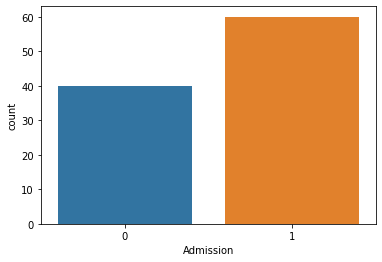

In [6]:
sns.countplot(x='Admission', data=df)

In [7]:
df.iloc[:, 0:3].corr()

,Marks in first exam,Marks in second exam,Admission
Marks in first exam,1.000000,-0.023665,0.574057
Marks in second exam,-0.023665,1.000000,0.512323
Admission,0.574057,0.512323,1.000000


<AxesSubplot:>

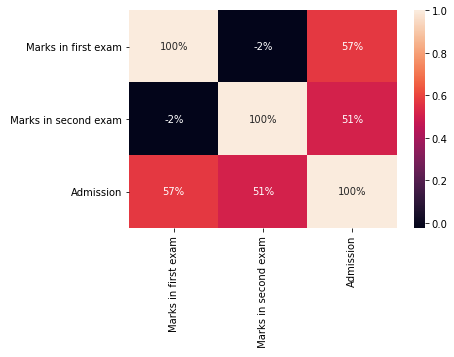

In [8]:
sns.heatmap(df.iloc[:, 0:3].corr(), annot = True, fmt = '.0%')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  0],
       [ 1, 13]], dtype=int64)

In [14]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP+TN) / (TP+TN+FP+FN)
accuracy

0.95

In [15]:
print(accuracy_score(y_test, y_pred))

0.95


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.93      0.96        14

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20

